In [1]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt 
from shapely.geometry import box


In [2]:
gdb_path = rf'D:\Datasets\Illegal Fishing\Original Data\WDPA_Jun2024_Public.gdb'
nea_ocean_path = rf'D:\Datasets\Illegal Fishing\Original Data\ne_atlantic\ne_atlantic.shp'

layers = fiona.listlayers(gdb_path)
print("layers =", layers)

layers = ['WDPA_poly_Jun2024', 'WDPA_point_Jun2024', 'WDPA_source_Jun2024']


Loading data about marine protected areas around the world which are in two formats, point and polygons as well as shape data about the North East Atlantic Ocean.

In [3]:
layers =  ['WDPA_poly_Jun2024', 'WDPA_point_Jun2024', 'WDPA_source_Jun2024']

poly_data = gpd.read_file(gdb_path, layer=layers[0])
point_data = gpd.read_file(gdb_path, layer=layers[1])

nea_ocean_data = gpd.read_file(nea_ocean_path)

c:\Users\gurpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [4]:
# Simplify the NE Atlantic shapefile
nea_ocean_data['geometry'] = nea_ocean_data['geometry'].simplify(tolerance=0.1, preserve_topology=True)

nea_ocean_data_bbox = nea_ocean_data.total_bounds  # returns [minx, miny, maxx, maxy]

# Filter MPZs based on the bounding box of the NE Atlantic
poly_mpz_filtered = poly_data[poly_data['geometry'].apply(lambda x: x.intersects(box(*nea_ocean_data_bbox)))]
point_mpz_filtered = point_data[point_data['geometry'].apply(lambda x: x.intersects(box(*nea_ocean_data_bbox)))]


In [5]:
nea_poly_mpz = gpd.sjoin(poly_mpz_filtered, nea_ocean_data, how='inner', predicate='intersects')
nea_point_mpz = gpd.sjoin(point_mpz_filtered, nea_ocean_data, how='inner', predicate='intersects')

In [6]:
nea_poly_mpz= nea_poly_mpz[['geometry', 'STATUS_YR']]
nea_point_mpz = nea_point_mpz[['geometry', 'STATUS_YR']]

nea_poly_mpz.to_file(rf'D:\Datasets\Illegal Fishing\Processed Data\Filtered MPA data\nea_ocean_poly_mpz.shp')
nea_point_mpz.to_file(rf'D:\Datasets\Illegal Fishing\Processed Data\Filtered MPA data\nea_ocean_point_mpz.shp')

Text(0.5, 1.0, 'Oceanic Marine Protected Zones')

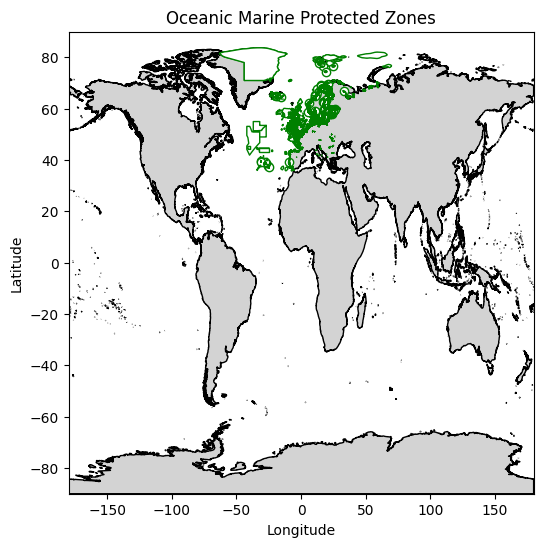

In [7]:
gdb_path_land = rf'D:\Datasets\Illegal Fishing\Original Data\ne_10m_land\ne_10m_land.shp'
land_data = gpd.read_file(gdb_path_land)

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

land_data.plot(ax=ax, color='lightgrey', edgecolor='black')
nea_point_mpz.plot(ax=ax, color = 'white', edgecolor = 'green')
nea_poly_mpz.plot(ax=ax, color = 'white', edgecolor = 'green')

ax.set_title('Oceanic Marine Protected Zones')